In [2]:
%load_ext autoreload
%autoreload 2

#Library
import numpy as np
import pandas as pd
import seaborn as sns

# Import the Delta
from geno4sd import delta


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load TCGA data to create dummy dataset

In [3]:
# Using TCGA Protstate cancer expression data, create a pair set of random patients for timepoint 1 to 2
rnaData = pd.read_csv( '../sample_data/TCGA_PRAD_RNA_tpm_m.csv', low_memory=False, index_col=0 )
rnaData_fakePairs = pd.DataFrame( [ list(rnaData.index[0:100]), list(rnaData.index[100:200]) ], index = ['pre', 'post'] ).transpose()

# Creat blocks of expression change for a subset of patients and gents
rnaData.loc[rnaData_fakePairs.iloc[20:40,0], rnaData.columns[10:30]] = 4
rnaData.loc[rnaData_fakePairs.iloc[20:40,1], rnaData.columns[10:30]] = 2000

rnaData.loc[rnaData_fakePairs.iloc[50:70,0], rnaData.columns[25:45]] = 2000
rnaData.loc[rnaData_fakePairs.iloc[50:70,1], rnaData.columns[25:45]] = 4

# Assign the datasubset to the working variables
X = np.log2(rnaData.iloc[:,0:50]+1)
pair_df = rnaData_fakePairs

## Run Delta

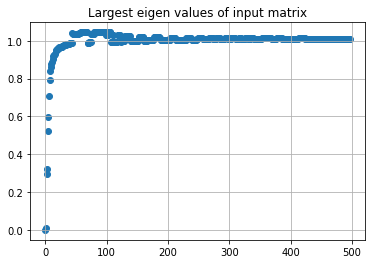

<Figure size 720x720 with 0 Axes>

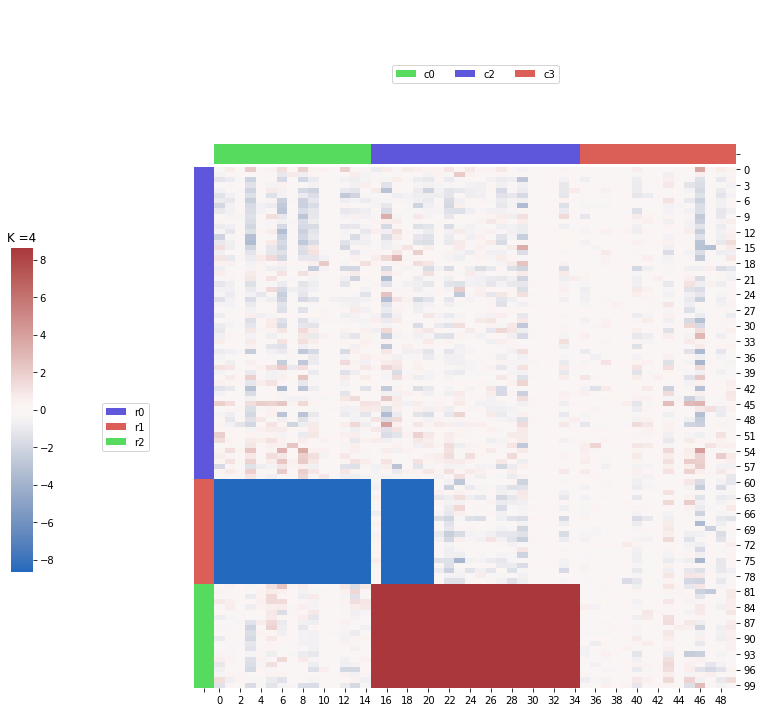

In [5]:
## Automatically determine optimal number of clusters by setting n_cluster to None
res = delta.calculate_patient_delta(df = X,
                                    pair_df = pair_df,
                                    n_cluster = None,
                                    plot = True )


<Figure size 720x720 with 0 Axes>

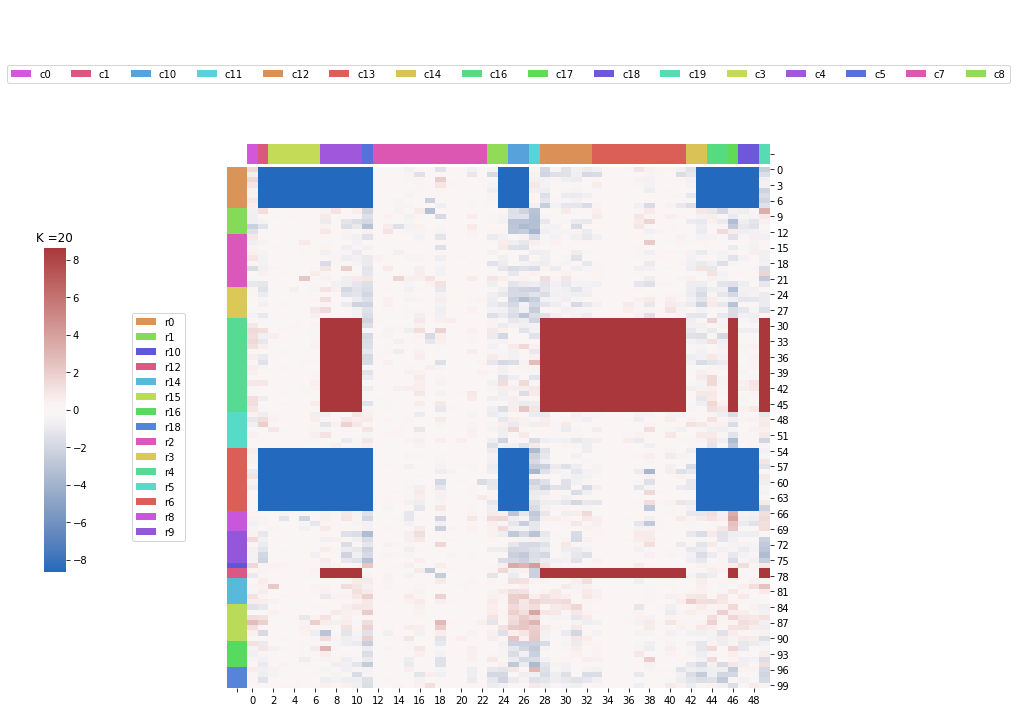

In [6]:
## Cluster with specified number of clusters
res = delta.calculate_patient_delta(df = X,
                                    pair_df = pair_df,
                                    n_cluster = 20,
                                    plot = True,
                                    savefile = '' )


<Figure size 720x720 with 0 Axes>

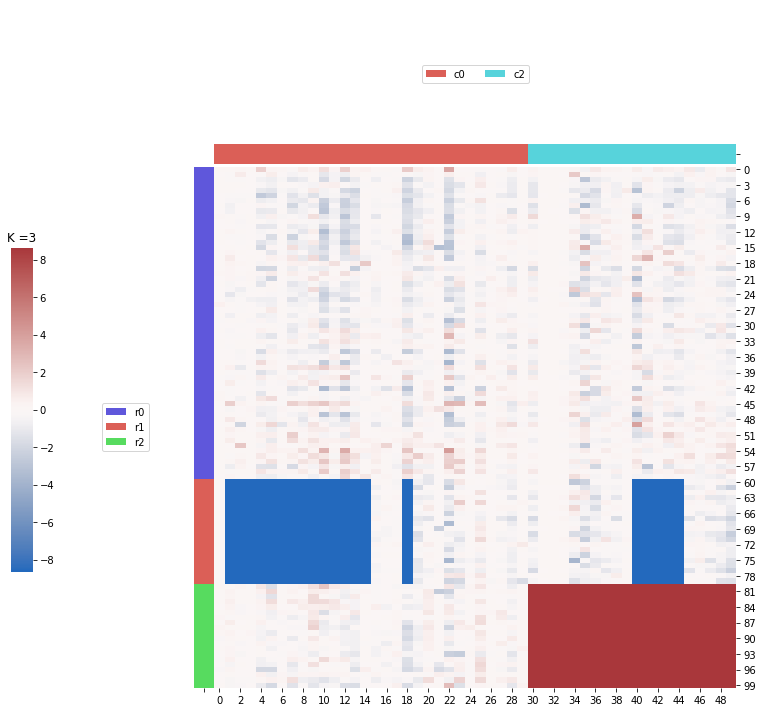

<Figure size 720x720 with 0 Axes>

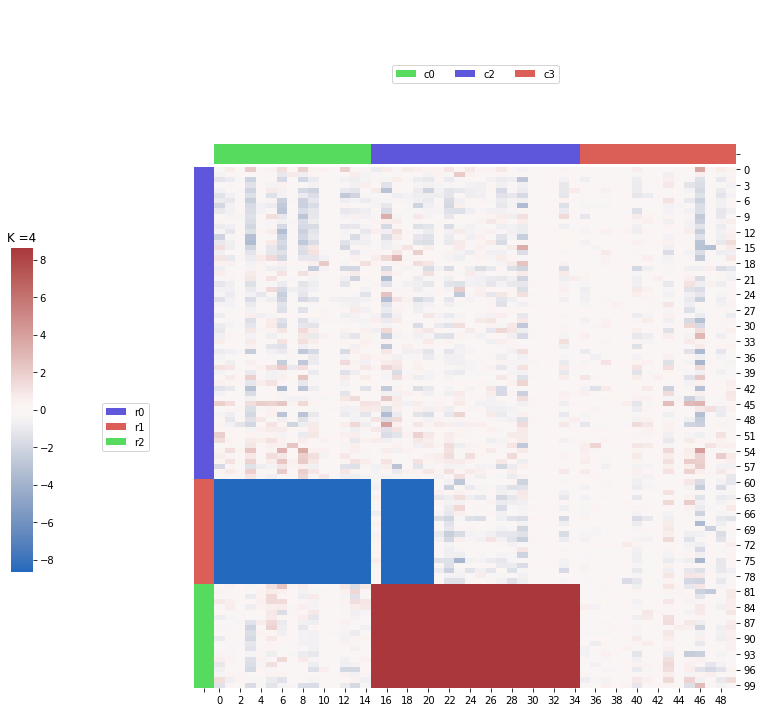

<Figure size 720x720 with 0 Axes>

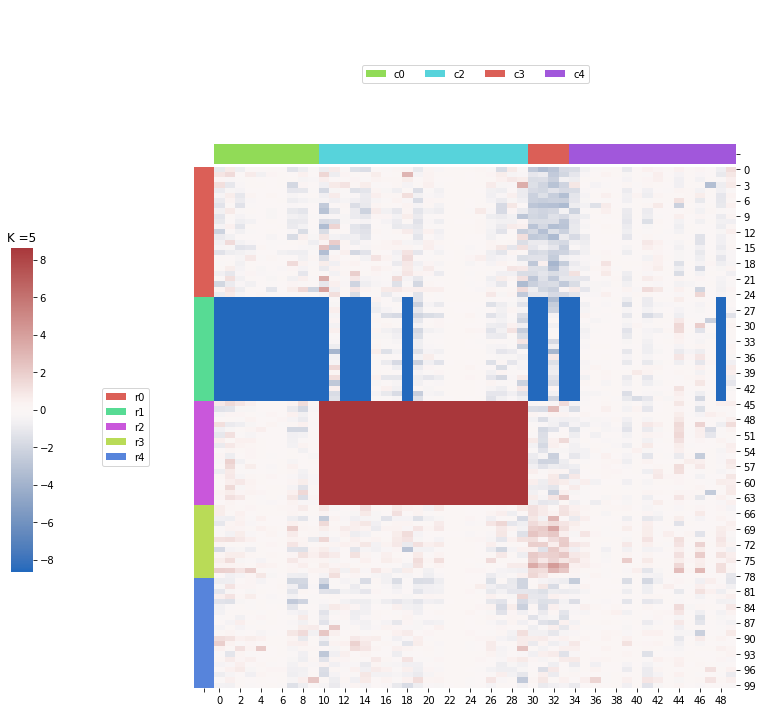

In [7]:
## Cluster over range of clusters
res = delta.calculate_patient_delta(df = X,
                                    pair_df = pair_df,
                                    n_cluster = list(range(3,6)),
                                    plot = True )


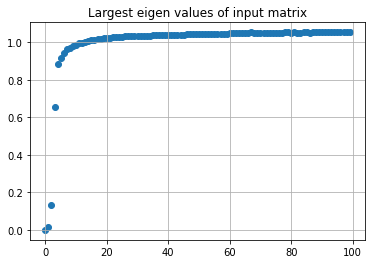

<Figure size 720x720 with 0 Axes>

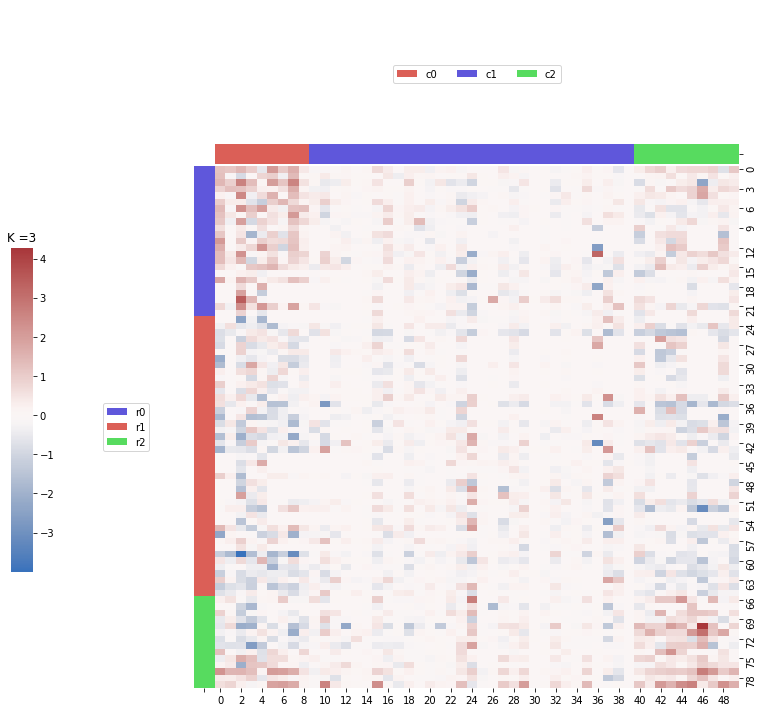

In [8]:
# Running delta with a sliding window
# Assign the datasubset to the working variables
pair_df = rnaData_fakePairs

patIDs = []
sampIDs = []
days_dx = dict()
for i in list(range(0,20)):
    for j in list(range(0,5)):
        p = 'pat' + str(i) 
        patIDs.append( p )
        s = p + '_samp' + str(j)
        sampIDs.append( s )
        days_dx[s] = np.random.randint(0,100)

X = np.log2(rnaData.iloc[0:len(sampIDs),0:50]+1)
X.index = sampIDs
X['patientID'] = patIDs

res = delta.calculate_patient_delta(df = X,
                                    days_dx = days_dx,
                                    n_cluster = None,
                                    plot = True,
                                    window_size = 2,
                                    mode = 'sliding',
                                    savefile = '' )